# Aula 2 
#### Análise de Sentimentos de tweets com textblob

Uma forma muito útil afim de recolher dados de algum assunto requerido é a ultilização de interpretação de linguagem natural, nesta aula vamos aplicar tal técnica em dados baixados do twitter.

Para baixar os tweets em tempo real você precisa de uma conta de desenvolvedor que pode ser criada [aqui]("https://developer.twitter.com")
Caso não tenha a conta você pode baixar seus datasets para treino [aqui]("https://twitter-sentiment-csv.herokuapp.com")

A biblioteca ultilizada para realizar as análises é a [textblob]("https://textblob.readthedocs.io/en/dev/") essa biblioteca realiza análize de linguagem de uma forma muito simples de usar, clique [aqui]("https://textblob.readthedocs.io/en/dev/install.html") e siga os passos para instalação. Existem outras bibliotecas mais complexas com muitas outras funções para reconhecimento e interpretaação de linguagem natural, se você quer se aprofundar nesse conteúdo vale a pena dar uma olhada pois tais bibliotecas são ultilizadas em aplicações reais e robustas, nosso exemplo é didático.

* [NLTK]("https://www.nltk.org")
* [SPACY]("https://spacy.io")


#### Primeiro vamos ver como textblob funciona com alguns comandos básicos para trabalhar com strings


In [1]:
from textblob import TextBlob as tb
string = tb("Arara Makerspace")
string[0:6]      #pega posição 0 até 6

TextBlob("Arara ")

In [2]:
string.upper()  #passa pra maiusculo 

TextBlob("ARARA MAKERSPACE")

In [3]:
string2 = tb(" - Luan para presidente") 
string + string2 #concatena as strings

TextBlob("Arara Makerspace - Luan para presidente")

## Tokenização

O textblob transforma as mensagens em uma sequencia tokens para que assim elas possam ser processadas.
Criando um objeto do tipo tb (textblob) e ultilizando o metodo sentences pode-se ver as sentenças tokenizadas.

In [4]:
blob = tb("Luan Manao is a wonderful person, he should be our president.")
blob.sentences

[Sentence("Luan Manao is a wonderful person, he should be our president.")]

#### Em um laço for podemos visualizar as sentenças separadamente

In [5]:
for words in blob.sentences[0].words:  ## imprime as palavras da primeira sentença
 print (words)

Luan
Manao
is
a
wonderful
person
he
should
be
our
president


### Extraindo substantivos
Como extraímos as palavras da seção anterior, em vez disso, podemos extrair as frases nominais do textblob. A extração de frase de substantivo é particularmente importante quando você deseja analisar o “quem” em uma frase. Vamos ver um exemplo abaixo.

In [6]:
for np in blob.noun_phrases:
 print (np)

luan manao
wonderful person


## Análise de sentimentos

A análise de sentimentos basicamente captura as sentenças na frase e processa elas para verificar verificar o contexto assim determinando se a emoção é positiva, negativa ou neutra.

A função sentiment do textblob retorna dois valores, ***polarity***, e ***subjectivity***

***polarity*** Varia de -1 a 1, onde 1 representa um sentimento positivo e -1 negativo.
***Subjectivity*** Varia de 0 a 1 e esta relacionado a opinião, quanto maior maior a probabilidade de que a sentença seja uma opinião pessoal.

In [7]:
blob.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

#### Obtivemos nessa sentença 1 e 1, onde a polatiry 1 representa que estamos falando bem de luan e subjective representa que é uma opinião pessoal, não uma constatação.

#### Agora vamos alterar a sentença e verificar o resultado

In [8]:
blob = tb("Luan is a sucker, I never want to talk about this asshole anymore.")
blob.sentiment

Sentiment(polarity=-0.3, subjectivity=0.8)

#### Obtivemos nessa sentença -0.3 e 1, onde a polatiry negativa representa que estamos falando mal de luan e subjective em 0.8 representa que é uma opinião pessoal, não uma constatação.

# Tradutor nativo

O textblob também tem uma ferramenta de tradução, e isso é muito útil pois a base de dados esta treinada para ter o melhor funcionamento em ingles, portanto antes de fazer a análise traduzimos ultilizando o textblob para ingles. A função detect_language já detecta automaticamente o idioma nativo.


In [9]:
blob = tb("O gabriel com certeza é a pessoa mais legal do makerspace")
blob.detect_language()

'pt'

***Para traduzir ultilizamos o comando translate***

In [10]:
blob.translate(from_lang='pt', to ='en')

TextBlob("Gabriel is certainly the coolest person on the makerspace.")

*** Em seguida realizamos a análise***

In [11]:
blob.sentiment

Sentiment(polarity=0.2, subjectivity=0.2)

Analisando o resultado obtemos 0.2 e 0.2, que por sua vez indica que o sentimento é positivo sobre Gabriel e como subjectivity é baixo não se trata de uma opinião pessoal e sim uma constatação. ***Atenção, palavras como certamente influenciam diretamente o subjectivity***

# Vamos aplicar esses conceitos

Usando um csv gerado a partir de tweets recentes podemos classificar várias  frases e trabalhar gerando conclucões com o pandas

In [12]:
import pandas as pd
tweets = pd.read_csv("data_science.csv")
tweets.head()

,text,user,Unnamed: 2,Unnamed: 3
0,How to #Study #MachineLearning by @sirajraval ...,Tableteer,NaN,NaN
1,@KirkDBorne @ShareInsights_ @KirkDBorne Thanks...,davecherry,NaN,NaN
2,RT @rdpeng: Science starts with a question. Da...,QuantInnovate,NaN,NaN
3,RT @rdpeng: Science starts with a question. Da...,hianalytics,NaN,NaN
4,RT @ekomudoh: Please I am seeking a Data Scie...,OduntanBolanle,NaN,NaN


#### Removemos as colunas não ultilizadas, inclusive username

In [13]:
#remove análise realizada anteriormente
tweets = tweets.drop('Unnamed: 2', 1)
tweets = tweets.drop('Unnamed: 3', 1)
tweets = tweets.drop('user', 1)
tweets.head()

,text
0,How to #Study #MachineLearning by @sirajraval ...
1,@KirkDBorne @ShareInsights_ @KirkDBorne Thanks...
2,RT @rdpeng: Science starts with a question. Da...
3,RT @rdpeng: Science starts with a question. Da...
4,RT @ekomudoh: Please I am seeking a Data Scie...


#### Observe que temos @, #, URLS, username e etc, precisamos limpar esses dados, para isso já preparamos anteriormente um script para limpar esses dados

In [43]:
import limpadata 
%matplotlib inline
#limpa os dados, removr @, RT, URLS e afins
tweets = limpadata.cleanData(tweets)
#remove coluna auxiliar criada pela função limpadata
tweets = tweets.drop('tweetos', 1)
tweets.head()

/home/gabs/CursoDataScience/Aula2-textblob/limpadata.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tweets['tweetos'][i] = tweets['text'].str.split(' ')[i][0]
/home/gabs/CursoDataScience/Aula2-textblob/limpadata.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tweets['tweetos'][i] = 'other'
/home/gabs/CursoDataScience/Aula2-textblob/limpadata.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tweets['text'][i] = " ".join([word for word in tweets['text'][i].split()


,text,polarity
0,how to study machinelearning by – frank's worl...,0.000000
1,thanks for sharing data storytelling is often ...,0.000000
2,rt science starts with a question data science...,-0.291667
3,rt science starts with a question data science...,-0.291667
4,rt please i am seeking a data science/data ana...,-0.200000


### Agora ultiliza-se o método sentiment.polarity para pegar somente a polarity dos tweets do banco dataframe, percorrendo todos os tweets, analizando e contabilizando todos, salvamos os resultados em um vetor

In [44]:
pol =  []
for tw in tweets['text']:
    analysis = tb(tw)
    pol.append(analysis.sentiment.polarity)

#### Após  contabilizar salvamos o resultado no dataframe

In [45]:
tweets['polarity'] = pol

In [46]:
tweets.head()

,text,polarity
0,how to study machinelearning by – frank's worl...,0.000000
1,thanks for sharing data storytelling is often ...,0.000000
2,rt science starts with a question data science...,-0.291667
3,rt science starts with a question data science...,-0.291667
4,rt please i am seeking a data science/data ana...,-0.200000


#### Já podemos realizar algumas análises, com describe obtêm-se o resumo estatístico

In [47]:
tweets.polarity.describe()

count    100.000000
mean       0.092283
std        0.266443
min       -0.400000
25%        0.000000
50%        0.000000
75%        0.152273
max        0.800000
Name: polarity, dtype: float64

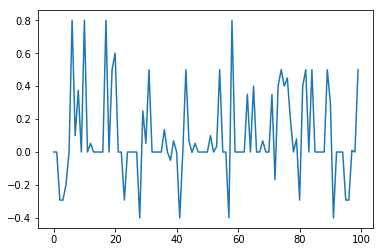

In [49]:
tweets.polarity.plot()

#### Pode-se executar queries para  separar os resultados positivos, negativos e neutros, em seguidas gu

In [66]:
positives = tweets[tweets['polarity'] > 0].count()
negatives = tweets[tweets['polarity'] < 0].count()
neutral = tweets[tweets['polarity'] == 0].count()

results = {'positivos':positives.text, 'negativos': negatives.text, 'neutros': neutral.text}
df = pd.DataFrame([results], columns=results.keys())
df

,positivos,neutros,negativos
0,37,49,14


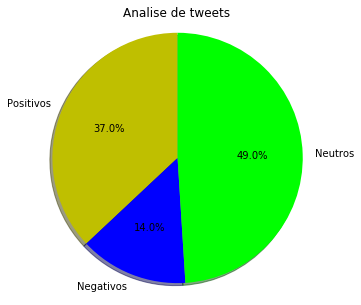

In [76]:
import matplotlib.pyplot as plt
labels = 'Positivos', 'Negativos', 'Neutros'
sizes = [df['positivos'], df['negativos'], df['neutros']]
colors = ['Y', 'B', '#00ff00']
explode = (0, 0, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Analise de tweets")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'